<a href="https://colab.research.google.com/github/anushac14/ai4all-unsupervised-learning/blob/main/AI4ALL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.sparse import hstack
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score
from scipy.sparse import csr_matrix


##Since it doesn’t contain direct user ratings, we’ll focus on a content-based recommendation system, where we recommend products similar to those a user has already shown interest in. This method will leverage the product’s categorical and textual data (like "Product Specification" and "Technical Details")

In [52]:
df=pd.read_csv('/content/drive/MyDrive/data.csv')

In [53]:
df.head(5)

,Uniq Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [54]:
df.isna().sum(),df.shape

(Uniq Id                      0
 Product Name                 0
 Brand Name               10002
 Asin                     10002
 Category                   830
 Upc Ean Code              9968
 List Price               10002
 Selling Price              107
 Quantity                 10002
 Model Number              1772
 About Product              273
 Product Specification     1632
 Technical Details          790
 Shipping Weight           1138
 Product Dimensions        9523
 Image                        0
 Variants                  7524
 Sku                      10002
 Product Url                  0
 Stock                    10002
 Product Details          10002
 Dimensions               10002
 Color                    10002
 Ingredients              10002
 Direction To Use         10002
 Is Amazon Seller             0
 Size Quantity Variant    10002
 Product Description      10002
 dtype: int64,
 (10002, 28))

In [55]:
df['Product Name'].unique()[10:20]

array(['Moonlite, 3-Story Bundle for Boys, Includes 3 Story Reels for Use with Storybook Projector',
       'DC Cover Girls: Black Canary by Joëlle Jones Statue',
       'Baby Doll Bedding Chevron Window Valance and Curtain Set, Orange',
       'LEGO Minecraft Creeper BigFig and Ocelot Characters 21156 Buildable Toy Minecraft Figure Gift Set for Play and Decoration, New 2020 (184 Pieces)',
       'C&D Visionary DC Comic Originals Flash Logo Sticker',
       'The Learning Journey ABC Melody Maker, Primary',
       'The Complete Common Core: State Standards Kit, Grade 5',
       "Flash Furniture 25''W x 45''L Trapezoid Red HP Laminate Activity Table - Height Adjustable Short Legs",
       'Schylling Veterinarian Kit',
       'Yellies! Frizz; Voice-Activated Spider Pet; Ages 5 & Up'],
      dtype=object)

In [56]:
df['Category'].unique()[:20]

array(['Sports & Outdoors | Outdoor Recreation | Skates, Skateboards & Scooters | Skateboarding | Standard Skateboards & Longboards | Longboards',
       'Toys & Games | Learning & Education | Science Kits & Toys',
       'Toys & Games | Arts & Crafts | Craft Kits',
       'Toys & Games | Hobbies | Models & Model Kits | Model Kits | Airplane & Jet Kits',
       'Toys & Games | Puzzles | Jigsaw Puzzles', nan,
       'Clothing, Shoes & Jewelry | Costumes & Accessories | Kids & Baby | Girls | Costumes',
       'Toys & Games | Arts & Crafts | Drawing & Painting Supplies | Crayons',
       'Home & Kitchen | Home Décor | Window Treatments | Window Stickers & Films | Window Films',
       'Toys & Games | Baby & Toddler Toys',
       'Toys & Games | Collectible Toys | Statues, Bobbleheads & Busts | Statues',
       'Baby Products | Nursery | Décor | Window Treatments | Valances',
       'Toys & Games | Building Toys | Building Sets',
       'Toys & Games | Baby & Toddler Toys | Musical Toys',


In [57]:
df['Selling Price'][:5]

,Selling Price
0,$237.68
1,$99.95
2,$34.99
3,$28.91
4,$17.49


In [58]:
df['Shipping Weight'].unique()[:10]

array(['10.7 pounds', '4 pounds', '12.8 ounces', '13.4 ounces',
       '1.4 pounds', '9.8 ounces', nan, '12.2 ounces', '1.5 pounds',
       '3.2 ounces'], dtype=object)

In [59]:
df['Technical Details'].unique()

array([nan,
       'The snap circuits mini kits classpack provides basic electric circuitry information for students in grades 2-6. This classpack includes 5 snap-together building kits. Components snap together to create working models of everyday electronic devices. Kits included are an FM radio, a motion detector, a music box, space battle sound effects, and a flying saucer. Each mini kit comes with individual components, and an activity guide which includes instructions and additional project ideas. Each primary-colored component represents one function in a circuit. Activity kits are used by teachers and students in classroom and homeschool settings for educational and research applications in science, math, and for a variety of additional disciplines. Science education products and manipulatives incorporate applied math and science principles into classroom or homeschool projects. Teachers in pre-K, elementary, and secondary classrooms use science education kits, manipualtives, a

#Feature extraction and processing

In [67]:
def to_ounces(weight):
    if pd.isna(weight):
        return np.nan
    weight_str = str(weight).strip().lower()
    try:
        if 'pound' in weight_str:
            return float(weight_str.split()[0]) * 16
        elif 'ounce' in weight_str:
            return float(weight_str.split()[0])
        else:
            return np.nan
    except ValueError:
        return np.nan

def preprocess_data(df):

    processed_df = df[['Product Name', 'Category', 'Selling Price',
                      'Product Specification', 'Technical Details',
                      'Shipping Weight', 'Is Amazon Seller']].copy()

    # Clean Selling Price
    processed_df['Selling Price'] = pd.to_numeric(
        processed_df['Selling Price'].astype('str').str.replace(r'[^\d.]', '', regex=True),
        errors='coerce'
    )

    # Clean Shipping Weight
    processed_df['Shipping Weight'] = processed_df['Shipping Weight'].apply(to_ounces)

    # Impute numerical values
    imputer = SimpleImputer(strategy='median')
    processed_df['Selling Price'] = imputer.fit_transform(processed_df[['Selling Price']])
    processed_df['Shipping Weight'] = imputer.fit_transform(processed_df[['Shipping Weight']])

    # Handle text fields
    processed_df['Technical Details'] = processed_df['Technical Details'].fillna('No detail available')
    processed_df = processed_df.dropna(subset=['Category', 'Product Specification'])

    # Create combined text field
    processed_df['combined'] = (processed_df['Product Specification'] + " " +
                              processed_df['Technical Details'] + " " +
                              processed_df['Category'])

    return processed_df.reset_index(drop=True)

def create_feature_matrix(processed_df, max_features=10000, ngram_range=(1, 2)):
    tfidf = TfidfVectorizer(
        stop_words='english',
        max_features=max_features,
        ngram_range=ngram_range
    )
    tfidf_matrix = tfidf.fit_transform(processed_df['combined'])

    # Scale numerical features
    scaler = MinMaxScaler()
    numeric_features = scaler.fit_transform(
        processed_df[['Selling Price', 'Shipping Weight']]
    )

    return hstack([tfidf_matrix, numeric_features])

def find_optimal_clusters(feature_matrix, max_clusters=15):
    #number of clusters using elbow method
    scores = []
    cluster_range = range(2, max_clusters)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(feature_matrix)
        scores.append(kmeans.inertia_)

    # Plot elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, scores, marker='o')
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

    return scores

def main(df):
    # Preprocess data
    processed_df = preprocess_data(df)

    # Create feature matrix
    feature_matrix = create_feature_matrix(
        processed_df,
        max_features=10000,
        ngram_range=(1, 2)
    )

    # Find optimal clusters
    scores = find_optimal_clusters(feature_matrix)

    return processed_df, feature_matrix, scores



#Recommendation model by content

In [69]:
class ProductRecommender:
    def __init__(self, df, feature_matrix, cluster_labels):

        self.df = df.copy()
        self.feature_matrix = csr_matrix(feature_matrix)
        self.df['cluster'] = cluster_labels

        # Normalize product names
        self.df['Product Name'] = self.df['Product Name'].str.strip().str.lower()

        # Create product name to index mapping
        self.product_to_idx = dict(zip(self.df['Product Name'], self.df.index))

    def find_similar_products(self, product_name: str, n_recommendations: int = 10) -> pd.DataFrame:

        try:
            # Normalize input product name
            product_name = product_name.strip().lower()

            # Check if product exists
            if product_name not in self.product_to_idx:
                raise ValueError(f"Product '{product_name}' not found in the dataset.")

            # Get product index and cluster
            idx = self.product_to_idx[product_name]
            product_cluster = self.df.loc[idx, 'cluster']

            # Filter products in the same cluster
            cluster_mask = self.df['cluster'] == product_cluster
            cluster_indices = self.df[cluster_mask].index

            # Calculate similarity scores
            product_features = self.feature_matrix[idx]
            cluster_features = self.feature_matrix[cluster_indices]
            sim_scores = cosine_similarity(product_features, cluster_features).flatten()

            # Create recommendations dataframe
            recommendations = pd.DataFrame({
                'Product Name': self.df.loc[cluster_indices, 'Product Name'],
                'Category': self.df.loc[cluster_indices, 'Category'],
                'Selling Price': self.df.loc[cluster_indices, 'Selling Price'],
                'Similarity': sim_scores,
                'Cluster': product_cluster
            })

            recommendations = (recommendations[recommendations.index != idx]
                            .sort_values('Similarity', ascending=False)
                            .head(n_recommendations)
                            .round({'Similarity': 3}))

            return recommendations

        except Exception as e:
            raise Exception(f"Error generating recommendations: {str(e)}")

    def get_cluster_summary(self, cluster_id: int) -> pd.DataFrame:

        cluster_data = self.df[self.df['cluster'] == cluster_id]

        summary = pd.DataFrame({
            'Total Products': [len(cluster_data)],
            'Average Price': [cluster_data['Selling Price'].mean()],
            'Price Range': [f"${cluster_data['Selling Price'].min():.2f} - ${cluster_data['Selling Price'].max():.2f}"],
            'Top Categories': [', '.join(cluster_data['Category'].value_counts().head(3).index)]
        })

        return summary

def create_recommender(df, feature_matrix, n_clusters=5):

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(feature_matrix)

    return ProductRecommender(df, feature_matrix, cluster_labels)



In [70]:
def display_recommendations(product_name, n_recommendations=10, include_price=True):

    try:
        # Get recommendations
        recommendations = recommender.find_similar_products(product_name, n_recommendations)

        original_product = recommender.df[recommender.df['Product Name'] == product_name.lower()].iloc[0]

        print("\n" + "="*80)
        print(f"Original Product: {product_name}")
        print(f"Category: {original_product['Category']}")
        if include_price:
            print(f"Price: ${original_product['Selling Price']:.2f}")
        print(f"Cluster: {original_product['cluster']}")
        print("="*80)

        cluster_summary = recommender.get_cluster_summary(original_product['cluster'])
        print("\nCluster Summary:")
        print("-"*40)
        for col, val in cluster_summary.iloc[0].items():
            print(f"{col}: {val}")

        # Print recommendations
        print("\nTop Recommendations:")
        print("-"*80)
        for idx, row in recommendations.iterrows():
            print(f"\n{row['Product Name']}")
            print(f"Category: {row['Category']}")
            if include_price:
                print(f"Price: ${row['Selling Price']:.2f}")
            print(f"Similarity Score: {row['Similarity']:.3f}")
            print("-"*40)

    except Exception as e:
        print(f"Error: {str(e)}")

products_to_test = [
    "The Learning Journey ABC Melody Maker, Primary",
    #"Guillow Airplane Design Studio with Travel Case Building Kit"
]

for product in products_to_test:
    display_recommendations(product)
    print("\n" + "="*80 + "\n")





Original Product: The Learning Journey ABC Melody Maker, Primary
Category: Toys & Games | Baby & Toddler Toys | Musical Toys
Price: $34.39
Cluster: 0

Cluster Summary:
----------------------------------------
Total Products: 3686
Average Price: 33.623589256646774
Price Range: $0.08 - $5999.00
Top Categories: Toys & Games | Puzzles | Jigsaw Puzzles, Toys & Games | Toy Figures & Playsets | Action Figures, Toys & Games | Games & Accessories | Board Games

Top Recommendations:
--------------------------------------------------------------------------------

11.5" super spinning space blaster
Category: Toys & Games | Novelty & Gag Toys
Price: $9.94
Similarity Score: 0.218
----------------------------------------

alex pretend melody mixer piano kids music activity
Category: Toys & Games | Learning & Education | Musical Instruments | Pianos & Keyboards
Price: $29.39
Similarity Score: 0.216
----------------------------------------

leapfrog my own leaptop (frustration free packaging)
Categor

#Interactive recommendation function

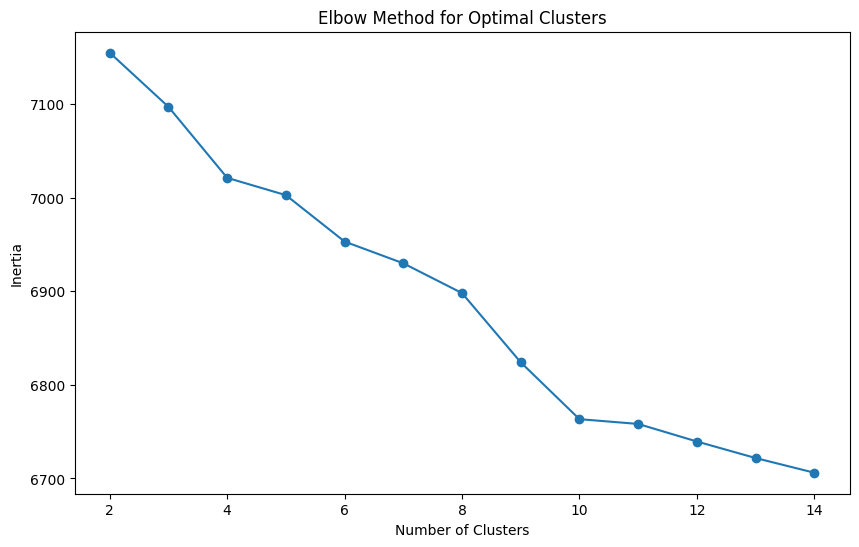


Original Product: The Learning Journey ABC Melody Maker, Primary
Category: Toys & Games | Baby & Toddler Toys | Musical Toys
Price: $34.39
Cluster: 0

Cluster Summary:
----------------------------------------
Total Products: 3686
Average Price: 33.623589256646774
Price Range: $0.08 - $5999.00
Top Categories: Toys & Games | Puzzles | Jigsaw Puzzles, Toys & Games | Toy Figures & Playsets | Action Figures, Toys & Games | Games & Accessories | Board Games

Top Recommendations:
--------------------------------------------------------------------------------

11.5" super spinning space blaster
Category: Toys & Games | Novelty & Gag Toys
Price: $9.94
Similarity Score: 0.218
----------------------------------------

alex pretend melody mixer piano kids music activity
Category: Toys & Games | Learning & Education | Musical Instruments | Pianos & Keyboards
Price: $29.39
Similarity Score: 0.216
----------------------------------------

leapfrog my own leaptop (frustration free packaging)
Categor

In [63]:
def get_interactive_recommendations():

    while True:
        print("\nProduct Recommendation System")
        print("="*30)
        print("1. Enter product name")
        print("2. View cluster summary")
        print("3. Exit")

        choice = input("\nEnter your choice (1-3): ")

        if choice == "1":
            product_name = input("\nEnter product name: ")
            n_recommendations = input("Number of recommendations (default 10): ")
            try:
                n_recommendations = int(n_recommendations) if n_recommendations else 10
                display_recommendations(product_name, n_recommendations)
            except ValueError:
                print("Invalid number of recommendations. Using default value of 10.")
                display_recommendations(product_name)

        elif choice == "2":
            cluster_id = input("\nEnter cluster ID: ")
            try:
                cluster_id = int(cluster_id)
                print("\nCluster Summary:")
                print("-"*40)
                print(recommender.get_cluster_summary(cluster_id))
            except ValueError:
                print("Invalid cluster ID. Please enter a number.")

        elif choice == "3":
            print("\nThank you for using the recommendation system!")
            break

        else:
            print("\nInvalid choice. Please try again.")


# Process data and create recommender
processed_df, feature_matrix, scores = main(df)
recommender = create_recommender(processed_df, feature_matrix, n_clusters=5)

# specific products
product_name = "The Learning Journey ABC Melody Maker, Primary"
display_recommendations(product_name)

get_interactive_recommendations()